### Openclassrooms Parcours Data Analyst 
### Projet 5 : BottleNeck
Auteur:  Luciana Zeferino
##### Objectifs du projet:

- 1) Réaiser une jointure de 3 tables (ERP + LIAISON + WEB)
- 2) Calculer le chiffre d'affaire par produit des ventes en ligne
- 3) Calculer de chiffre d'affaire total des ventes en ligne
- 4) Analyse d'outleris de la colonne 'Price'
   - A) Lister les outliers
   - B) Faire une répresentation graphique des outliers

#### Libraries et Settings

In [40]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [41]:
# Settings
pd.set_option('display.float_format', lambda x: f'{x:,.1f}') # Pour ne pas afficher montant en scientific notation
plt.rc('figure', figsize=(15, 8)) # taille du graphique

#### Data preparation

In [42]:
# Reading datasets
erp = pd.read_excel('C:/Users/Luciana/Documents/Openclassrooms/Projet-5/erp.xlsx')
liaison = pd.read_excel('C:/Users/Luciana/Documents/Openclassrooms/Projet-5/liaison.xlsx')
web = pd.read_excel('C:/Users/Luciana/Documents/Openclassrooms/Projet-5/web.xlsx')


c:\Users\Luciana\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\Luciana\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\Luciana\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [43]:
erp.info()
erp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [44]:
liaison.info()
liaison

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [45]:
web.info()
web

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [46]:
# Valeurs manquantes ERP
null_erp = erp.isna().sum().sort_values(ascending=False) / len(erp)*100
null_erp

product_id       0.0
onsale_web       0.0
price            0.0
stock_quantity   0.0
stock_status     0.0
dtype: float64

In [47]:
# Valeurs manquantes LIAISON
null_liaison = liaison.isna().sum().sort_values(ascending=False) / len(liaison)*100
null_liaison

id_web       11.0
product_id    0.0
dtype: float64

In [48]:
# Valeurs manquantes WEB
null_web = web.isna().sum().sort_values(ascending=False) / len(web)*100
null_web

tax_class               100.0
post_content_filtered   100.0
post_content            100.0
post_password           100.0
post_mime_type           52.8
tax_status               52.7
post_excerpt             52.7
sku                       5.6
ping_status               5.5
post_type                 5.5
menu_order                5.5
guid                      5.5
post_parent               5.5
post_modified_gmt         5.5
post_modified             5.5
post_name                 5.5
post_status               5.5
comment_status            5.5
post_title                5.5
post_date_gmt             5.5
post_date                 5.5
post_author               5.5
total_sales               5.5
average_rating            5.5
comment_count             5.5
virtual                   0.0
rating_count              0.0
downloadable              0.0
dtype: float64

In [49]:
# Supprimer les colonnes avec qui n'ont que de valeurs nulls de la table WEB
web = web.drop(columns=['tax_class', 'post_content_filtered', 'post_content', 'post_password']) # drop colonnes avec null
web.columns = web.columns.str.replace('sku', 'id_web') # changer nom de la colonne
web

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [50]:
# Check for duplicates dans la table WEB
web.duplicated().value_counts()

False    1431
True       82
dtype: int64

In [51]:
# Supprimer valeurs dupliqués de la table WEB
web = web.drop_duplicates()
web

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


### 1) Jointure des tables WEB + ERP + LIAISON  

In [52]:
# Merge ERP + LIAISON
erp_merged = erp.merge(liaison, on='product_id', how= 'inner')
erp_merged

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [53]:
# Merge ERP_MERGED + WEB
all_merged = web.merge(erp_merged, how= 'right', on='id_web')
all_merged 

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,15298,0.0,0.0,0.0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock
1,15298,0.0,0.0,0.0,0.0,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,3847,1,24.2,0,outofstock
2,15296,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock
3,15296,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,3849,1,34.3,0,outofstock
4,15300,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3850,1,20.8,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,13127-1,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,7247,1,54.8,23,instock
1717,13127-1,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,7247,1,54.8,23,instock
1718,14680-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,7329,0,26.5,14,instock
1719,16230,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2020-07-20 11:00:00,2020-07-20 09:00:00,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,7338,1,16.3,45,instock


In [54]:
# Checking for duplicates
duplicates = all_merged.duplicated().value_counts()
duplicates


False    1721
dtype: int64

### 2) Chiffre d’affaires par produit

In [55]:
# Remplacer valeurs nulls par Zéros dans les colonnes 'total_sales' et 'price'
all_merged['total_sales'] = all_merged['total_sales'].fillna(0)
all_merged['price'] = all_merged['price'].fillna(0)

In [56]:
# Calcul du Chiffre d'affaire
chiffre_affaire_prod_1 = all_merged[all_merged["onsale_web"]==1] # selectionner seulement les ventes web
chiffre_affaire_prod = chiffre_affaire_prod_1[chiffre_affaire_prod_1["post_type"]=='product'] # selectionner seulement les lignes produits et pas images / ces deux lignes contiennent les mêmes infos
chiffre_affaire_prod['chiffre_affaire'] = chiffre_affaire_prod['total_sales']*chiffre_affaire_prod['price'] # créer colonne avec le calcul du chiffre d'affaire par produit
chiffre_affaire_prod = chiffre_affaire_prod[['id_web','product_id','total_sales', 'price', 'chiffre_affaire']] # sélectionner colonnes pertinantes
chiffre_affaire_prod = chiffre_affaire_prod.sort_values(by='chiffre_affaire', ascending=False) # ordonner la table par ordre décroissante de la colonne 'chiffre d'affaire'
chiffre_affaire_prod = chiffre_affaire_prod.reset_index(drop=True) # reset index de la table
chiffre_affaire_prod

C:\Users\Luciana\AppData\Local\Temp\ipykernel_12536\2006237873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chiffre_affaire_prod['chiffre_affaire'] = chiffre_affaire_prod['total_sales']*chiffre_affaire_prod['price'] # créer colonne avec le calcul du chiffre d'affaire par produit


,id_web,product_id,total_sales,price,chiffre_affaire
0,7818,4334,96.0,49.0,"4,704.0"
1,1662,4144,87.0,49.0,"4,263.0"
2,3510,4402,13.0,176.0,"2,288.0"
3,11641,4142,30.0,53.0,"1,590.0"
4,304,4141,40.0,39.0,"1,560.0"
...,...,...,...,...,...
715,15436,4240,0.0,28.0,0.0
716,14469,5448,0.0,7.2,0.0
717,16328,5446,0.0,16.2,0.0
718,12194,5445,0.0,16.3,0.0


In [57]:
# checking for duplicates
duplicates = chiffre_affaire_prod.duplicated().value_counts()
duplicates

False    717
True       3
dtype: int64

In [58]:
# supprimer les 3 valeurs dupliqués
chiffre_affaire_prod= chiffre_affaire_prod.drop_duplicates()
chiffre_affaire_prod

,id_web,product_id,total_sales,price,chiffre_affaire
0,7818,4334,96.0,49.0,"4,704.0"
1,1662,4144,87.0,49.0,"4,263.0"
2,3510,4402,13.0,176.0,"2,288.0"
3,11641,4142,30.0,53.0,"1,590.0"
4,304,4141,40.0,39.0,"1,560.0"
...,...,...,...,...,...
715,15436,4240,0.0,28.0,0.0
716,14469,5448,0.0,7.2,0.0
717,16328,5446,0.0,16.2,0.0
718,12194,5445,0.0,16.3,0.0


In [59]:
chiffre_affaire_prod.isna().sum() # checking for NA's

id_web             3
product_id         0
total_sales        0
price              0
chiffre_affaire    0
dtype: int64

In [60]:
chiffre_affaire_prod.info() # nom et nb de colonnes et data type
chiffre_affaire_prod.describe() # statistiques des colonnes numériques

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 719
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_web           714 non-null    object 
 1   product_id       717 non-null    int64  
 2   total_sales      717 non-null    float64
 3   price            717 non-null    float64
 4   chiffre_affaire  717 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 33.6+ KB


,product_id,total_sales,price,chiffre_affaire
count,717.0,717.0,717.0,717.0
mean,"5,032.1",4.0,32.7,98.4
std,789.0,8.5,28.1,307.1
min,"3,847.0",0.0,5.2,0.0
25%,"4,281.0",0.0,14.1,0.0
50%,"4,797.0",1.0,23.7,15.2
75%,"5,709.0",4.0,42.6,91.0
max,"7,338.0",96.0,225.0,"4,704.0"


### 3) Total du chiffre d’affaires réalisé en ligne

In [61]:
# Calcul du chiffre d'affaire total réalisé en ligne
chiffre_affaire_web =  chiffre_affaire_prod['chiffre_affaire'].sum()
chiffre_affaire_web.round(1)

70568.6

### 4) Outliers de la colonne 'Price'
* A) Les lister
* B) Faire une représentation graphique

In [62]:
# Statistiques de la colonne 'Prix'
chiffre_affaire_prod['price'].describe()

count   717.0
mean     32.7
std      28.1
min       5.2
25%      14.1
50%      23.7
75%      42.6
max     225.0
Name: price, dtype: float64

In [63]:
# Ordonner dataset par la colonne 'Price' en ordre croissante
chiffre_affaire_prod = chiffre_affaire_prod.sort_values(by='price', ascending=True).reset_index() 
chiffre_affaire_prod

,index,id_web,product_id,total_sales,price,chiffre_affaire
0,522,14570,6129,0.0,5.2,0.0
1,57,16210,4172,43.0,5.7,245.1
2,423,14338,5777,0.0,5.7,0.0
3,205,16211,4173,13.0,5.7,74.1
4,305,16209,4174,6.0,5.7,34.2
...,...,...,...,...,...,...
712,429,15185,5767,0.0,175.0,0.0
713,2,3510,4402,13.0,176.0,"2,288.0"
714,24,14983,5892,3.0,191.3,573.9
715,580,14581,5001,0.0,217.5,0.0


#### A) Trouver les outliers et les lister

##### Methode 1) IQR Interquartile Range

In [64]:
# 1) Trouver les quartiles 1 et 2 
q1, q3= np.percentile(chiffre_affaire_prod['price'],[25,75]) 
q1 # valeur quartile 1

14.1

In [65]:
q3 # valeur quartile 2

42.6

In [66]:
# 2) Calcul du IQR
iqr = q3 - q1
iqr

28.5

In [67]:
# 3) La valeur 1.5 en dessous et en dessus du IQR
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
lower_bound # en dessous de cet valeur c'est un outlier

-28.65

In [68]:
upper_bound # en dessus de cet valeur c'est un outlier

85.35

In [69]:
# 4) Liste des IQR en dessus de 85.35
iqr_outliers = chiffre_affaire_prod[chiffre_affaire_prod["price"]> upper_bound]
iqr_outliers

,index,id_web,product_id,total_sales,price,chiffre_affaire
684,186,13853,4359,1.0,85.6,85.6
685,569,13913,5026,0.0,86.8,0.0
686,440,11668,4132,0.0,88.4,0.0
687,643,19822,5565,0.0,92.0,0.0
688,407,14774,5916,0.0,93.0,0.0
689,532,11601,6214,0.0,99.0,0.0
690,435,15382,4115,0.0,100.0,0.0
691,619,14805,4903,0.0,102.3,0.0
692,164,3509,4407,1.0,104.0,104.0
693,574,11602,5008,0.0,105.0,0.0


* En utilisant cette methode on trouve 32 valeurs outliers

##### Methode 2) Z Score

In [70]:
# Fonction pour detecter outliers
outliers=[]
def detect_outlier(data):
    
    threshold=3 # 3 fois l'écart type de la moyenne
    mean_1 = np.mean(data) # calcule la moyenne
    std_1 =np.std(data) # calcule l'écart type/ standard deviation
    
    
    for i in data:
        z_score= (i - mean_1)/std_1 # calcul de Z score / Combien d'écart type 
        if np.abs(z_score) > threshold:  # si le z-score est supérieur à 3 x l'écart type de la moyenne
            outliers.append(i)
    return outliers

In [71]:
outlier_datapoints = detect_outlier(chiffre_affaire_prod['price'])
outlier_datapoints

[121.0,
 121.0,
 122.0,
 124.8,
 126.5,
 135.0,
 137.0,
 144.0,
 157.0,
 175.0,
 176.0,
 191.3,
 217.5,
 225.0]

* en utilisant cette methode on retrouve 14 outliers

In [72]:
# La même chose en utilisant scipy
outliers = chiffre_affaire_prod[(np.abs(stats.zscore(chiffre_affaire_prod['price'])) > 3)]
outliers

,index,id_web,product_id,total_sales,price,chiffre_affaire
703,534,15072,6213,0.0,121.0,0.0
704,531,15070,6216,0.0,121.0,0.0
705,408,14775,5917,0.0,122.0,0.0
706,635,14915,5612,0.0,124.8,0.0
707,5,12589,4355,11.0,126.5,"1,391.5"
708,49,14923,6126,2.0,135.0,270.0
709,19,14220,4904,5.0,137.0,685.0
710,566,NaN,4594,0.0,144.0,0.0
711,623,7819,4406,0.0,157.0,0.0
712,429,15185,5767,0.0,175.0,0.0


##### Methode 3) Quantile filter

In [78]:
# Trier les valeurs top 1%
quantile_dessus = chiffre_affaire_prod["price"].quantile(0.99) #filter le 1% des valeurs au dessus
filter = chiffre_affaire_prod[chiffre_affaire_prod["price"] > quantile_dessus]
filter

,index,id_web,product_id,total_sales,price,chiffre_affaire
709,19,14220,4904,5.0,137.0,685.0
710,566,NaN,4594,0.0,144.0,0.0
711,623,7819,4406,0.0,157.0,0.0
712,429,15185,5767,0.0,175.0,0.0
713,2,3510,4402,13.0,176.0,"2,288.0"
714,24,14983,5892,3.0,191.3,573.9
715,580,14581,5001,0.0,217.5,0.0
716,6,15940,4352,5.0,225.0,"1,125.0"


* Avec cette methode on trouve 8 outliers

##### Methode 4) Catalina : moyenne + 3 ou 5 fois le standard deviation

In [80]:
# Methode utilisée par Catalina(Mentor)
std_triple = np.mean(chiffre_affaire_prod['price']) + (np.std(chiffre_affaire_prod['price']) * 3)
std_triple.round(0)

117.0

In [81]:
# Trier les valeurs au dessus de la valeur obtenu avec la methode 4
outliers_filter = chiffre_affaire_prod[chiffre_affaire_prod["price"] > std_triple]
outliers_filter

,index,id_web,product_id,total_sales,price,chiffre_affaire
703,534,15072,6213,0.0,121.0,0.0
704,531,15070,6216,0.0,121.0,0.0
705,408,14775,5917,0.0,122.0,0.0
706,635,14915,5612,0.0,124.8,0.0
707,5,12589,4355,11.0,126.5,"1,391.5"
708,49,14923,6126,2.0,135.0,270.0
709,19,14220,4904,5.0,137.0,685.0
710,566,NaN,4594,0.0,144.0,0.0
711,623,7819,4406,0.0,157.0,0.0
712,429,15185,5767,0.0,175.0,0.0


* Avec cette methode on trouve les mêmes quantités d'outliers qu'en utilisant la methode Zscore, soit 14.

#### B) Représentation graphique des outliers

##### Distribution / Histogram

Text(117.07640073422834, 50, 'Zscore/Methode 4: 117.08')

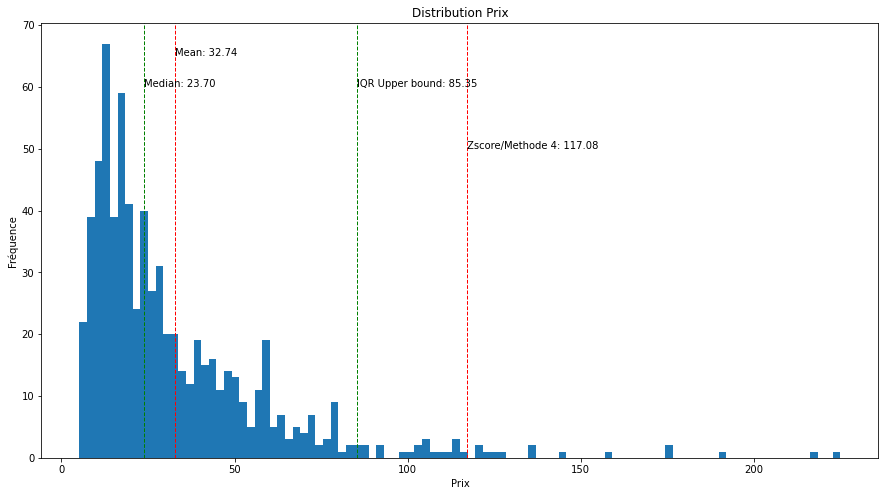

In [96]:
# Histogram
plt.hist(chiffre_affaire_prod.price, bins=100)
plt.gca().set(title='Distribution Prix', xlabel= 'Prix', ylabel='Fréquence')

# Mean Line
plt.axvline(chiffre_affaire_prod['price'].mean(), color='r', linestyle='dashed',  linewidth=1)
plt.text(chiffre_affaire_prod['price'].mean(), s= 'Mean: {:.2f}'.format(chiffre_affaire_prod['price'].mean()), y= 65)

# Median Line
plt.axvline(chiffre_affaire_prod['price'].median(), color='g', linestyle='dashed',  linewidth=1)
plt.text(chiffre_affaire_prod['price'].median(), s= 'Median: {:.2f}'.format(chiffre_affaire_prod['price'].median()), y= 60)

# IQR Upper bound line
plt.axvline(upper_bound, color='g', linestyle='dashed',  linewidth=1)
plt.text(upper_bound, s= 'IQR Upper bound: {:.2f}'.format(upper_bound), y= 60)

# Zscore / Methode 4
plt.axvline(std_triple, color='r', linestyle='dashed',  linewidth=1)
plt.text(std_triple, s= 'Zscore/Methode 4: {:.2f}'.format(std_triple), y= 50)

##### Statterplot

Text(117.07640073422834, 7000, 'Zscore/Methode 4: 117.08')

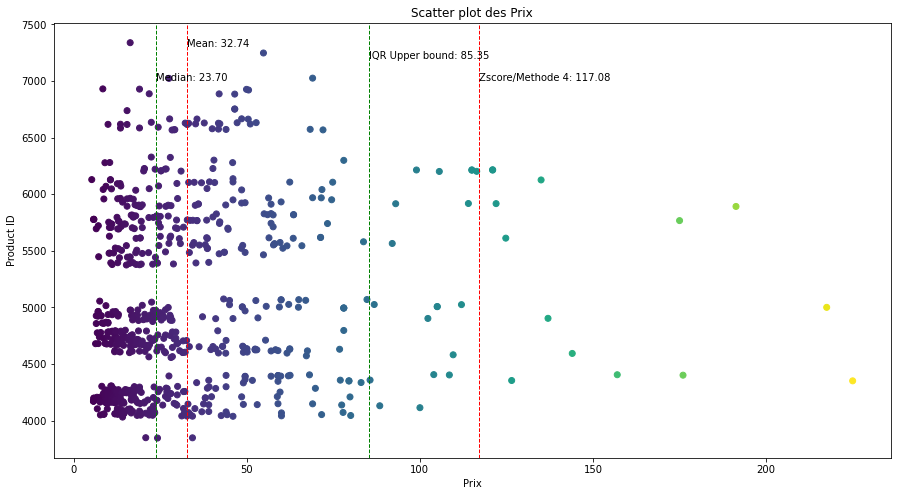

In [95]:
# Scatterplot 
plt.scatter(chiffre_affaire_prod.price, chiffre_affaire_prod.product_id, c=chiffre_affaire_prod.price)
plt.gca().set(title='Scatter plot des Prix', xlabel= 'Prix', ylabel='Product ID')

# Mean Line
plt.axvline(chiffre_affaire_prod['price'].mean(), color='r', linestyle='dashed',  linewidth=1)
plt.text(chiffre_affaire_prod['price'].mean(), s= 'Mean: {:.2f}'.format(chiffre_affaire_prod['price'].mean()), y= 7300)

# Median Line
plt.axvline(chiffre_affaire_prod['price'].median(), color='g', linestyle='dashed',  linewidth=1)
plt.text(chiffre_affaire_prod['price'].median(), s= 'Median: {:.2f}'.format(chiffre_affaire_prod['price'].median()), y= 7000)

# IQR Upper bound line
plt.axvline(upper_bound, color='g', linestyle='dashed',  linewidth=1)
plt.text(upper_bound, s= 'IQR Upper bound: {:.2f}'.format(upper_bound), y= 7200)

# Zscore / Methode 4
plt.axvline(std_triple, color='r', linestyle='dashed',  linewidth=1)
plt.text(std_triple, s= 'Zscore/Methode 4: {:.2f}'.format(std_triple), y= 7000)

##### Plot

Text(117.07640073422834, 117, 'Zscore/Methode 4: 117.08')

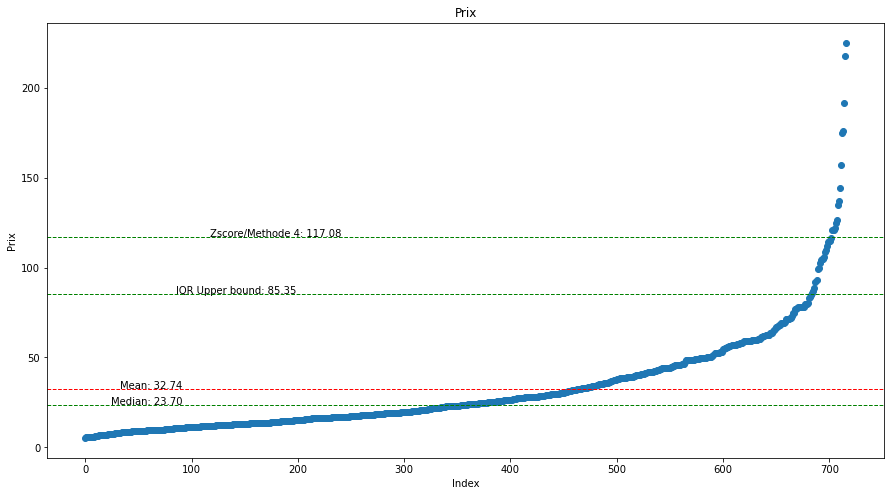

In [94]:
plt.plot(chiffre_affaire_prod['price'], 'o')
plt.gca().set(title='Plot des Prix', xlabel= 'Index', ylabel='Prix')

# Mean line
plt.axhline(chiffre_affaire_prod['price'].mean(), color='r', linestyle='dashed',  linewidth=1)
plt.text(chiffre_affaire_prod['price'].mean(), s= 'Mean: {:.2f}'.format(chiffre_affaire_prod['price'].mean()), y= 32.74)

# Median line
plt.axhline(chiffre_affaire_prod['price'].median(), color='g', linestyle='dashed',  linewidth=1)
plt.text(chiffre_affaire_prod['price'].median(), s= 'Median: {:.2f}'.format(chiffre_affaire_prod['price'].median()), y= 23.70)

# IQR Upper bound line
plt.axhline(upper_bound, color='g', linestyle='dashed',  linewidth=1)
plt.text(upper_bound, s= 'IQR Upper bound: {:.2f}'.format(upper_bound), y= 85.35)

# Zscore / Methode 4
plt.axhline(std_triple, color='g', linestyle='dashed',  linewidth=1)
plt.text(std_triple, s= 'Zscore/Methode 4: {:.2f}'.format(std_triple), y= 117)


##### Boxplot

Text(117.07640073422834, 0.8, 'Zscore/Methode 4: 117.08')

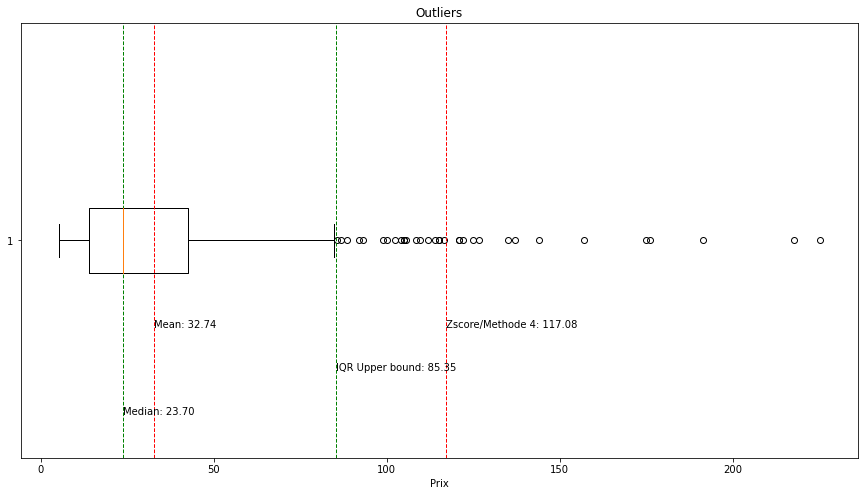

In [97]:
# Boxplot
plt.boxplot(chiffre_affaire_prod.price, vert=False) # vert for "no vertical"
plt.gca().set(title='Outliers', xlabel= 'Prix')

# Mean Line
plt.axvline(chiffre_affaire_prod['price'].mean(), color='r', linestyle='dashed',  linewidth=1)
plt.text(chiffre_affaire_prod['price'].mean(), s= 'Mean: {:.2f}'.format(chiffre_affaire_prod['price'].mean()), y= 0.8)

# Median Line
plt.axvline(chiffre_affaire_prod['price'].median(), color='g', linestyle='dashed',  linewidth=1)
plt.text(chiffre_affaire_prod['price'].median(), s= 'Median: {:.2f}'.format(chiffre_affaire_prod['price'].median()), y= 0.6)

# IQR Upper bound line
plt.axvline(upper_bound, color='g', linestyle='dashed',  linewidth=1)
plt.text(upper_bound, s= 'IQR Upper bound: {:.2f}'.format(upper_bound), y= 0.7)

# Zscore / Methode 4
plt.axvline(std_triple, color='r', linestyle='dashed',  linewidth=1)
plt.text(std_triple, s= 'Zscore/Methode 4: {:.2f}'.format(std_triple), y= 0.8)